In [1]:
from tensorflow.keras.layers import Dense,Flatten,Input                         # TO BUILT LAYERS FOR OUR NEURAL NETWORK
from tensorflow.keras.models import Model,load_model                            # TO CREATE AND LOAD MODEL
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img    # DATA AUGMENTATION AND LOAD IMAGES
import matplotlib.pyplot as plt                                                 # TO PLOT GRAPHS
from glob import glob                                                           # TO RETRIEVE THE FOLDERS 
from tensorflow.keras.applications import InceptionV3                           # OUR TRANSFER LERANING TECHNIQUE

In [3]:
IMAGE_SIZE=[224,224]                                         # DEFAULT IMAGE SIZE FOR ALL TRANSFER LEARNING TECHNIQUES

# DATA PATHS IN GOOGLE COLAB
train_path='/content/drive/MyDrive/dataset/train'
val_path='/content/drive/MyDrive/dataset/valid'
test_path='/content/drive/MyDrive/dataset/test'


In [2]:
from google.colab import drive
drive.mount('/content/drive')                               # MOUNT TO OUR GOOGLE DRIVE FOR DATASET

Mounted at /content/drive


In [4]:
folders=glob('/content/drive/MyDrive/dataset/train/*')
folders                                                       # WE GET FILE NAMES IN THE FOLDER

['/content/drive/MyDrive/dataset/train/without_mask',
 '/content/drive/MyDrive/dataset/train/with_mask']

In [5]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)  # INITIALIZING InceptionV3 TO DOWNLOAD PRETRAINED WEIGHTS

87916544/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in inception.layers:
  layer.trainable=False                                                 # TELLING OUT MODEL THAT WE NEED PRETRAINED LAYERS

In [7]:
inception.summary()                                                     # METADATA OF THE MODEL

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
x=Flatten()(inception.output)                               #  FLATTENING THE BOTTLENECK LAYER SO THAT WE CAN IMPLEMENT THE CLASSIFIER ON OUR OWN

In [9]:
prediction=Dense(len(folders),activation='softmax')(x)      # OUTPUT LAYER

model=Model(inputs=inception.input,outputs=prediction)      # CONNECTING OUR LAYERS TO INCEPTIONV3

In [10]:
model.summary()                                             # FINAL SUMMARY OF OUR MODEL

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])        # COMPILING OUR MODEL BY TELLING OUR REQUIREMENTS

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,                                # DATA AUGMENTATION
                                 horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=100,class_mode='categorical')   # STORE OUR DATA FOR TRAINING
val_set=val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=100,class_mode='categorical')         # FOR VALIDATING OUR MODEL

Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [14]:
# THIS BLOCK IS MANDATORY SO THAT OUR SYSTEM KNOWS HOW MUCH GPU IT MUST BE USED. 0.5 IS RECOMMENDED

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input     # WHEN WE INPUT IMAGE IT WILL BE USEFUL, NOW NO USE

In [15]:
# FITTING OUR MODEL

r=model.fit_generator(train_set,validation_data=val_set,epochs=10,steps_per_epoch=len(train_set),validation_steps=len(val_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
35/37 [===========================>..] - ETA: 43s - loss: 2.7221 - accuracy: 0.8160 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


37/37 [==============================] - 1002s 27s/step - loss: 2.5968 - accuracy: 0.8245 - val_loss: 0.0842 - val_accuracy: 0.9864
Epoch 2/10
37/37 [==============================] - 53s 1s/step - loss: 0.0762 - accuracy: 0.9934 - val_loss: 0.0684 - val_accuracy: 0.9913
Epoch 3/10
37/37 [==============================] - 53s 1s/step - loss: 0.0541 - accuracy: 0.9949 - val_loss: 0.0749 - val_accuracy: 0.9926
Epoch 4/10
37/37 [==============================] - 54s 1s/step - loss: 0.0236 - accuracy: 0.9975 - val_loss: 0.0665 - val_accuracy: 0.9938
Epoch 5/10
37/37 [==============================] - 53s 1s/step - loss: 0.0226 - accuracy: 0.9963 - val_loss: 0.0579 - val_accuracy: 0.9926
Epoch 6/10
37/37 [==============================] - 53s 1s/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0522 - val_accuracy: 0.9926
Epoch 7/10
37/37 [==============================] - 53s 1s/step - loss: 0.0279 - accuracy: 0.9948 - val_loss: 0.0662 - val_accuracy: 0.9926
Epoch 8/10
37/37 [==========

In [18]:
model.save('/content/drive/MyDrive/model_inception_v3.h5')           # SAVING OUR TRAINED MODEL

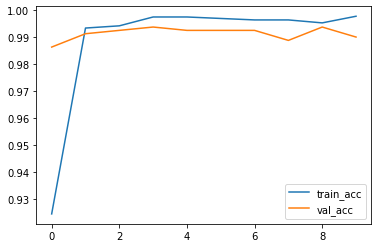

In [16]:
# PLOTTING OUR TRAINING AND VALIDATION ACCURACY 

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

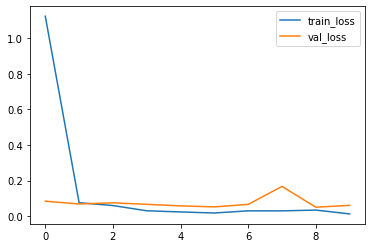

In [17]:
# PLOTTING OUR TRAINING AND VALIDATION LOSS

plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()